# Trying the Prediction the Loan Defaul based on provided features

# Importing the Usual Library

In [53]:
#matrix library
import numpy as np
#dataframe manipulation library
import pandas as pd
#importing regular expression
import re
#train_test_split to split the dataset
from sklearn.model_selection import train_test_split,StratifiedKFold
#Scaler
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler
#Classification based machine learning model
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings(action='ignore')
pd.set_option('max_columns',None)
#visualization 
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset with pandas read_csv

In [33]:
df=pd.read_csv('/kaggle/input/lt-vehicle-loan-default-prediction/train.csv')
#showing the datadf=pd.read_csv('/kaggle/input/lt-vehicle-loan-default-prediction/test.csv')

# Getting the Preliminary Information about the dataset

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 41 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   UniqueID                             233154 non-null  int64  
 1   disbursed_amount                     233154 non-null  int64  
 2   asset_cost                           233154 non-null  int64  
 3   ltv                                  233154 non-null  float64
 4   branch_id                            233154 non-null  int64  
 5   supplier_id                          233154 non-null  int64  
 6   manufacturer_id                      233154 non-null  int64  
 7   Current_pincode_ID                   233154 non-null  int64  
 8   Date.of.Birth                        233154 non-null  object 
 9   Employment.Type                      225493 non-null  object 
 10  DisbursalDate                        233154 non-null  object 
 11  State_ID     

# Checking for the Total Null values in the dataset

In [35]:
df.isna().sum()

UniqueID                                  0
disbursed_amount                          0
asset_cost                                0
ltv                                       0
branch_id                                 0
supplier_id                               0
manufacturer_id                           0
Current_pincode_ID                        0
Date.of.Birth                             0
Employment.Type                        7661
DisbursalDate                             0
State_ID                                  0
Employee_code_ID                          0
MobileNo_Avl_Flag                         0
Aadhar_flag                               0
PAN_flag                                  0
VoterID_flag                              0
Driving_flag                              0
Passport_flag                             0
PERFORM_CNS.SCORE                         0
PERFORM_CNS.SCORE.DESCRIPTION             0
PRI.NO.OF.ACCTS                           0
PRI.ACTIVE.ACCTS                

# Checking the Shape of the Dataset

In [36]:
df.shape

(233154, 41)

# There are 41 features and 23314 rows in the dataset

# Checking the Correlation Matrix

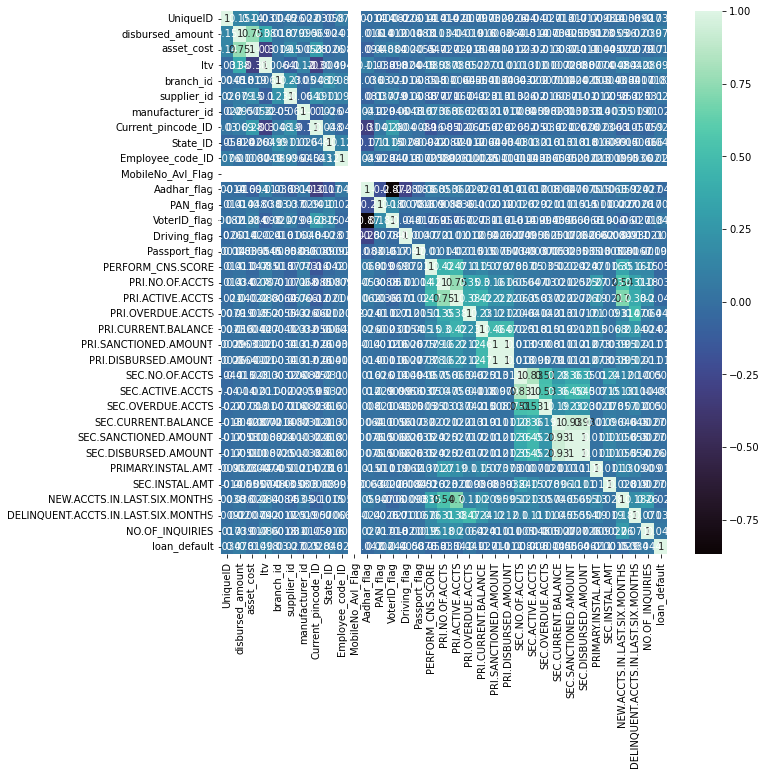

In [37]:
corr=df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True,cmap='mako')
plt.show()

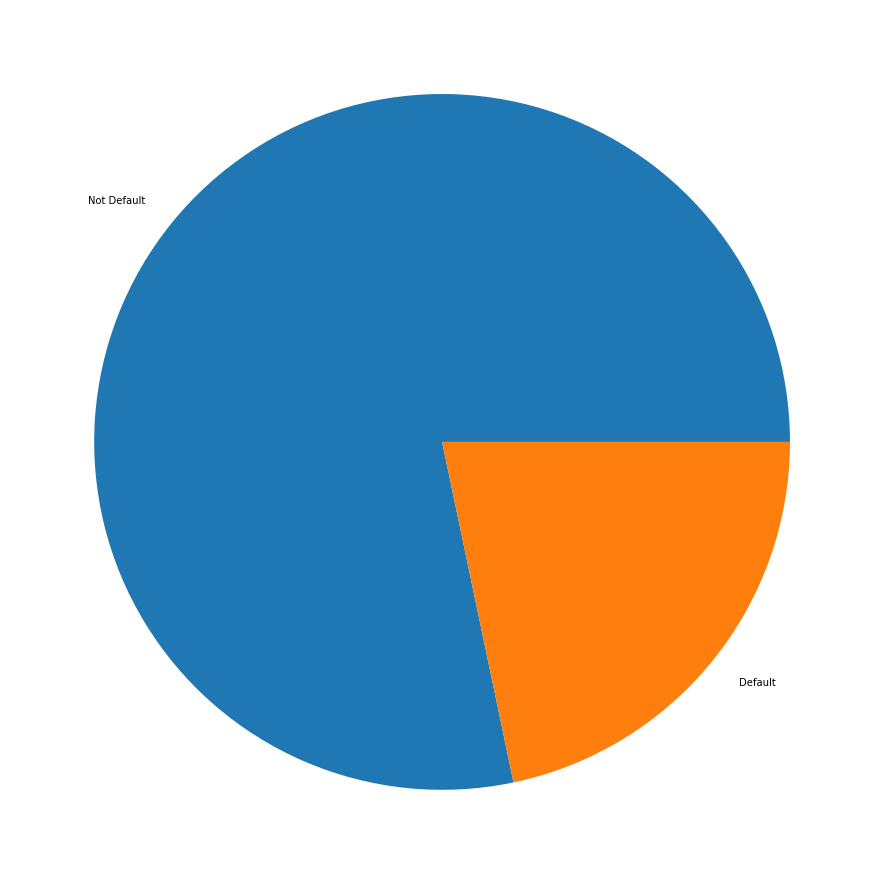

In [38]:
plt.figure(figsize=(16,16))
plt.pie(train_df['loan_default'].value_counts(),labels=['Not Default','Default'])
plt.show()

# Checking for the number unique value in each columns

In [39]:
train_df[['branch_id','manufacturer_id','State_ID','PERFORM_CNS.SCORE.DESCRIPTION']]

,branch_id,manufacturer_id,State_ID,PERFORM_CNS.SCORE.DESCRIPTION
0,67,45,6,No Bureau History Available
1,67,45,6,I-Medium Risk
2,67,45,6,No Bureau History Available
3,67,45,6,L-Very High Risk
4,67,45,6,No Bureau History Available
...,...,...,...,...
233149,34,48,6,D-Very Low Risk
233150,34,51,6,A-Very Low Risk
233151,77,86,4,No Bureau History Available
233152,77,86,4,No Bureau History Available


In [40]:
{column:len(df[column].unique()) for column in train_df.columns}

{'UniqueID': 233154,
 'disbursed_amount': 24565,
 'asset_cost': 46252,
 'ltv': 6579,
 'branch_id': 82,
 'supplier_id': 2953,
 'manufacturer_id': 11,
 'Current_pincode_ID': 6698,
 'Date.of.Birth': 15433,
 'Employment.Type': 3,
 'DisbursalDate': 84,
 'State_ID': 22,
 'Employee_code_ID': 3270,
 'MobileNo_Avl_Flag': 1,
 'Aadhar_flag': 2,
 'PAN_flag': 2,
 'VoterID_flag': 2,
 'Driving_flag': 2,
 'Passport_flag': 2,
 'PERFORM_CNS.SCORE': 573,
 'PERFORM_CNS.SCORE.DESCRIPTION': 20,
 'PRI.NO.OF.ACCTS': 108,
 'PRI.ACTIVE.ACCTS': 40,
 'PRI.OVERDUE.ACCTS': 22,
 'PRI.CURRENT.BALANCE': 71341,
 'PRI.SANCTIONED.AMOUNT': 44390,
 'PRI.DISBURSED.AMOUNT': 47909,
 'SEC.NO.OF.ACCTS': 37,
 'SEC.ACTIVE.ACCTS': 23,
 'SEC.OVERDUE.ACCTS': 9,
 'SEC.CURRENT.BALANCE': 3246,
 'SEC.SANCTIONED.AMOUNT': 2223,
 'SEC.DISBURSED.AMOUNT': 2553,
 'PRIMARY.INSTAL.AMT': 28067,
 'SEC.INSTAL.AMT': 1918,
 'NEW.ACCTS.IN.LAST.SIX.MONTHS': 26,
 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS': 14,
 'AVERAGE.ACCT.AGE': 192,
 'CREDIT.HISTORY.LENG

# Checking the Unique Value in Perform CNS Score Description

In [41]:
train_df['PERFORM_CNS.SCORE.DESCRIPTION'].unique()

array(['No Bureau History Available', 'I-Medium Risk', 'L-Very High Risk',
       'A-Very Low Risk',
       'Not Scored: Not Enough Info available on the customer',
       'D-Very Low Risk', 'M-Very High Risk', 'B-Very Low Risk',
       'C-Very Low Risk', 'E-Low Risk', 'H-Medium Risk', 'F-Low Risk',
       'K-High Risk',
       'Not Scored: No Activity seen on the customer (Inactive)',
       'Not Scored: Sufficient History Not Available',
       'Not Scored: No Updates available in last 36 months', 'G-Low Risk',
       'J-High Risk', 'Not Scored: Only a Guarantor',
       'Not Scored: More than 50 active Accounts found'], dtype=object)

# Creating the Preprocess Inputs

In [42]:
def encode_duration(df,column):
    df=df.copy()
    df[column+'_yrs']=df[column].apply(lambda x:re.search(r'\d+(?=yrs)',x).group(0)).astype(np.int)
    df[column+'_mon']=df[column].apply(lambda x:re.search(r'\d+(?=mon)',x).group(0)).astype(np.int)
    df=df.drop(column,axis=1)
    return df

In [43]:
def onehot_encode(df,column):
    df=df.copy()
    dummies=pd.get_dummies(df[column],prefix=column)
    df=pd.concat([df,dummies],axis=1)
    df=df.drop(column,axis=1)
    return df

In [47]:
def preprocess_inputs(df,scaler):
    df=df.copy()
    #Dropping the Unique ID column
    df=df.drop('UniqueID',axis=1)
    #columns with high cardinality
    high_cardinality_columns=['supplier_id','Current_pincode_ID','Employee_code_ID']
    #dropping on axis 1
    df=df.drop(high_cardinality_columns,axis=1)
    #filling the missing values of Employment.Type
    df['Employment.Type']=df['Employment.Type'].fillna('Unemployed')
    #Extracting month year from date columns
    df['dob_month']=pd.to_datetime(df['Date.of.Birth']).dt.month
    df['dob_year']=pd.to_datetime(df['Date.of.Birth']).dt.year
    df['dob_day']=pd.to_datetime(df['Date.of.Birth']).dt.day
    df['disbursal_month']=pd.to_datetime(df['DisbursalDate']).dt.month
    df['disbursal_year']=pd.to_datetime(df['DisbursalDate']).dt.year
    df['disbursal_day']=pd.to_datetime(df['DisbursalDate']).dt.day
    #dropping the original date column
    df=df.drop(['Date.of.Birth','DisbursalDate'],axis=1)
    df=encode_duration(df,'AVERAGE.ACCT.AGE')
    df=encode_duration(df,'CREDIT.HISTORY.LENGTH')
    #dropping the original column

    #onehot_ encoding categorical features
    
    
    onehot_columns=['branch_id','manufacturer_id','State_ID','PERFORM_CNS.SCORE.DESCRIPTION','Employment.Type']
    for column in onehot_columns:
        df=onehot_encode(df,column)
    #spliting the dataset
    y=df['loan_default']
    x=df.drop('loan_default',axis=1)
    #scaling the dataset
    x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
    #train_test_split
    x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7)
    return x_train,x_test,y_train,y_test

# Notes:-
* High Cardinality Columns are those categorical column which have high number of unique values in them

In [54]:
x_train,x_test,y_train,y_test=preprocess_inputs(df,RobustScaler())
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(163207, 175)
(69947, 175)
(163207,)
(69947,)


# Creating the Model

In [55]:
model=LogisticRegression()
model.fit(x_train,y_train)
score=model.score(x_test,y_test)
print(score)

0.7847227186298197


* The Model's Performance on StandardScaler() is 78%
* The Model's Performance on MinMaxScaler() is 78%
* The Model's Performance on RobustScaler() is 78%

NameError: name 'x' is not defined